In [1]:
#匯入訓練、驗證、測試圖像
import os,shutil

base_dir = 'Rec'
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)
    
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [2]:
#建立訓練集資料夾
train_b_dir = os.path.join(train_dir, 'be')
os.mkdir(train_b_dir)

train_h_dir = os.path.join(train_dir, 'ho')
os.mkdir(train_h_dir)


train_y_dir = os.path.join(train_dir, 'yun')
os.mkdir(train_y_dir)

In [3]:
#建立驗證集資料夾
validation_b_dir = os.path.join(validation_dir, 'be')
os.mkdir(validation_b_dir)

validation_h_dir = os.path.join(validation_dir, 'ho')
os.mkdir(validation_h_dir)

validation_y_dir = os.path.join(validation_dir, 'yun')
os.mkdir(validation_y_dir)


In [4]:
#建立測試集資料夾
test_b_dir = os.path.join(test_dir, 'be')
os.mkdir(test_b_dir)

test_h_dir = os.path.join(test_dir, 'ho')
os.mkdir(test_h_dir)

test_y_dir = os.path.join(test_dir, 'yun')
os.mkdir(test_y_dir)


In [5]:
#擷取be資料集的圖片範圍
original_0dataset_dir = 'be'
fnames = ['be.{}.png'.format(i) for i in range(20)]
for fname in fnames:
    src = os.path.join(original_0dataset_dir, fname)
    dst = os.path.join(train_b_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['be.{}.png'.format(i) for i in range(45, 54)]
for fname in fnames:
    src = os.path.join(original_0dataset_dir, fname)
    dst = os.path.join(validation_b_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['be.{}.png'.format(i) for i in range(54, 59)]
for fname in fnames:
    src = os.path.join(original_0dataset_dir, fname)
    dst = os.path.join(test_b_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
#擷取ho資料集的圖片範圍
original_0dataset_dir = 'ho'
fnames = ['ho.{}.png'.format(i) for i in range(20)]
for fname in fnames:
    src = os.path.join(original_0dataset_dir, fname)
    dst = os.path.join(train_h_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['ho.{}.png'.format(i) for i in range(45, 54)]
for fname in fnames:
    src = os.path.join(original_0dataset_dir, fname)
    dst = os.path.join(validation_h_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['ho.{}.png'.format(i) for i in range(54, 59)]
for fname in fnames:
    src = os.path.join(original_0dataset_dir, fname)
    dst = os.path.join(test_h_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
#擷取yun資料集的圖片範圍
original_0dataset_dir = 'yun'
fnames = ['yun.{}.png'.format(i) for i in range(20)]
for fname in fnames:
    src = os.path.join(original_0dataset_dir, fname)
    dst = os.path.join(train_y_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['yun.{}.png'.format(i) for i in range(45, 54)]
for fname in fnames:
    src = os.path.join(original_0dataset_dir, fname)
    dst = os.path.join(validation_y_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['yun.{}.png'.format(i) for i in range(54, 59)]
for fname in fnames:
    src = os.path.join(original_0dataset_dir, fname)
    dst = os.path.join(test_y_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
len(test_y_dir)

12

In [8]:
#建立cnn
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

In [9]:
#優化器
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
#ImageDataGenerator套件label圖片
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 100),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=20,
        class_mode='categorical')

Found 60 images belonging to 3 classes.
Found 27 images belonging to 3 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 100, 100, 3)
labels batch shape: (20, 3)


In [12]:
#epoch訓練30
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 94s 940ms/step - loss: 0.6316 - acc: 0.7760 - val_loss: 0.8940 - val_acc: 0.7778
Epoch 2/30
100/100 [==============================] - 93s 930ms/step - loss: 0.4135 - acc: 0.8530 - val_loss: 0.6577 - val_acc: 0.7037
Epoch 3/30
100/100 [==============================] - 94s 941ms/step - loss: 0.2813 - acc: 0.8860 - val_loss: 0.6228 - val_acc: 0.6296
Epoch 4/30
100/100 [==============================] - 93s 933ms/step - loss: 0.1676 - acc: 0.9280 - val_loss: 1.7445 - val_acc: 0.5926
Epoch 5/30
100/100 [==============================] - 94s 939ms/step - loss: 0.1259 - acc: 0.9370 - val_loss: 1.0945 - val_acc: 0.5926
Epoch 6/30
100/100 [==============================] - 94s 942ms/step - loss: 0.1062 - acc: 0.9405 - val_loss: 2.6368 - val_acc: 0.5926
Epoch 7/30
100/100 [==============================] - 96s 960ms/step - loss: 0.0993 - acc: 0.9390 - val_loss: 1.2031 - val_acc: 0.5926
Epoch 8/30
100/100 [==============================] - 9

In [13]:
model.save('train1.h5')

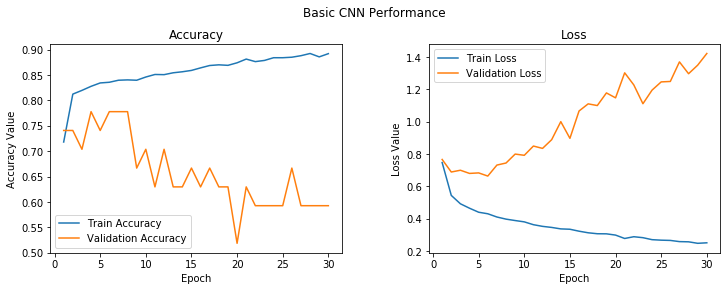

In [20]:
#可視化結果
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [21]:
#套入VGG16模型
from keras.applications import VGG16


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(100,100, 3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)        

In [22]:
#使用conv_base的模型先抽取特徵跟label產出，將特徵提取後進行降維輸出
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'Rec'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 3, 512))
    labels = np.zeros(shape=(sample_count,3))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical'
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        print(labels_batch)
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
           
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 60)
validation_features, validation_labels = extract_features(validation_dir, 20)
test_features, test_labels = extract_features(test_dir, 15)

Found 60 images belonging to 3 classes.
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
Found 27 images belonging to 3 classes.
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 

In [23]:
train_features = np.resize(train_features, (60, 3 * 3 * 512))
validation_features = np.resize(validation_features, (20, 3 * 3 * 512))
test_features = np.resize(test_features, (15, 3 * 3 * 512))

In [24]:
#建立優化防止梯度下降訓練
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=3 * 3 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=100,
                    validation_data=(validation_features, validation_labels))

Train on 60 samples, validate on 20 samples
Epoch 1/30
60/60 [==============================] - 1s 10ms/step - loss: 2.0313 - acc: 0.3167 - val_loss: 1.8868 - val_acc: 0.3000
Epoch 2/30
60/60 [==============================] - 0s 483us/step - loss: 1.8181 - acc: 0.3333 - val_loss: 1.7381 - val_acc: 0.3000
Epoch 3/30
60/60 [==============================] - 0s 566us/step - loss: 1.6853 - acc: 0.3000 - val_loss: 1.6217 - val_acc: 0.3000
Epoch 4/30
60/60 [==============================] - 0s 550us/step - loss: 1.6355 - acc: 0.3167 - val_loss: 1.5229 - val_acc: 0.3000
Epoch 5/30
60/60 [==============================] - 0s 483us/step - loss: 1.5393 - acc: 0.3333 - val_loss: 1.4473 - val_acc: 0.3000
Epoch 6/30
60/60 [==============================] - 0s 550us/step - loss: 1.5782 - acc: 0.2833 - val_loss: 1.3734 - val_acc: 0.3000
Epoch 7/30
60/60 [==============================] - 0s 533us/step - loss: 1.4986 - acc: 0.2833 - val_loss: 1.3062 - val_acc: 0.3000
Epoch 8/30
60/60 [===============

In [25]:
model.save('train3.h5')

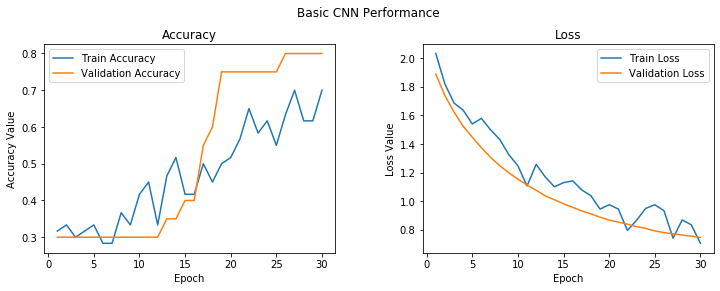

In [26]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


In [27]:
import keras as ks
model = ks.models.load_model('train3.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 771       
Total params: 1,180,675
Trainable params: 1,180,675
Non-trainable params: 0
_________________________________________________________________


In [28]:
#訓練結果提取，建立混淆矩陣
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn.metrics import confusion_matrix
predictions = model.predict_classes(test_features)

In [29]:
from numpy import argmax
from keras.utils.np_utils import to_categorical
test_labels_change = [0]*15
for i in range(12):
    if(np.array_equal(test_labels[i],[0,0,1])):
        test_labels_change[i] = 2
    elif(np.array_equal(test_labels[i],[0,1,0])):
        test_labels_change[i] = 1
    elif(np.array_equal(test_labels[i],[1,0,0])):
        test_labels_change[i] = 0

print(test_labels_change)
test_labels_change = np.asarray(test_labels_change)
print(test_labels_change.shape)

[1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0]
(15,)


In [30]:
print(test_labels_change.shape)
print(predictions.shape)
pd.crosstab(test_labels_change, predictions, rownames=['實際值'], colnames=['預測值'])

(15,)
(15,)


預測值,0,1,2
實際值,,,
0,5,1,1
1,0,4,0
2,0,0,4
